In [1]:
import numpy as np
import utils as u
from utils import linear, logarithmic, cubic, sigmoid, transform_function, sum_transformed_functions
import matplotlib.pyplot as plt
import pandas as pd


### Examples of the chosen base functions

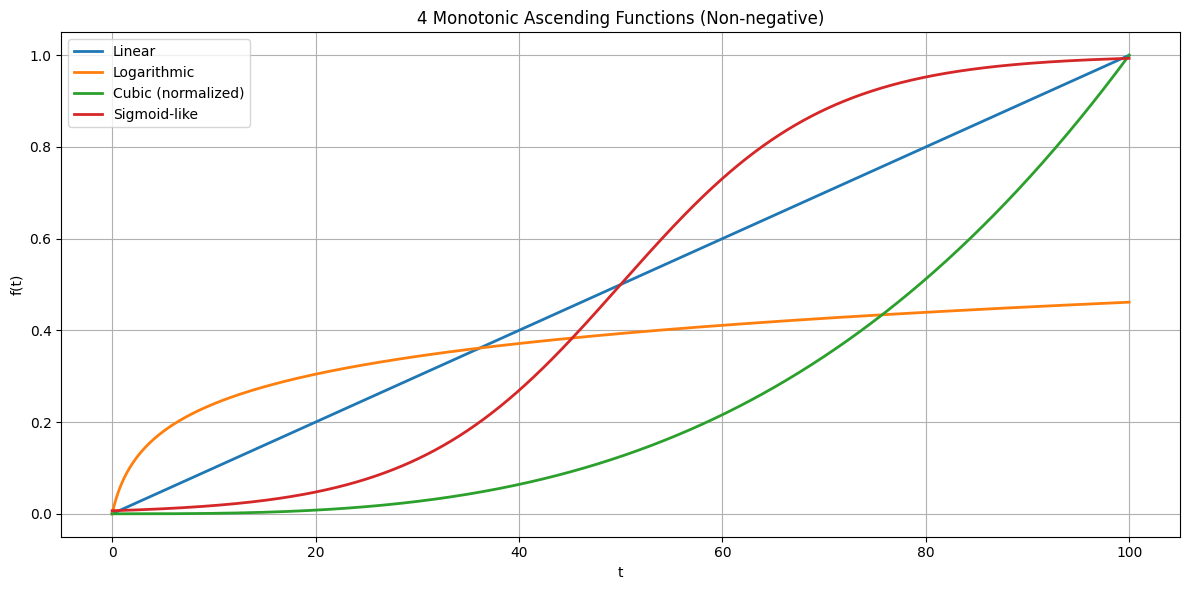

In [2]:
# Define the x-axis (t values from 0 to 100)
start_time = 0
end_time = 100
num_points = 1000
t = np.linspace(start_time, end_time, num_points)

# Evaluate functions
y_linear = 0.01* linear(t)
y_log = 0.1*logarithmic(t)
y_cubic = cubic(t)
y_sigmoid = sigmoid(t)

u.plot_monotonic_functions(t, y_linear, y_log, y_cubic, y_sigmoid)


### Example of transformation on each function

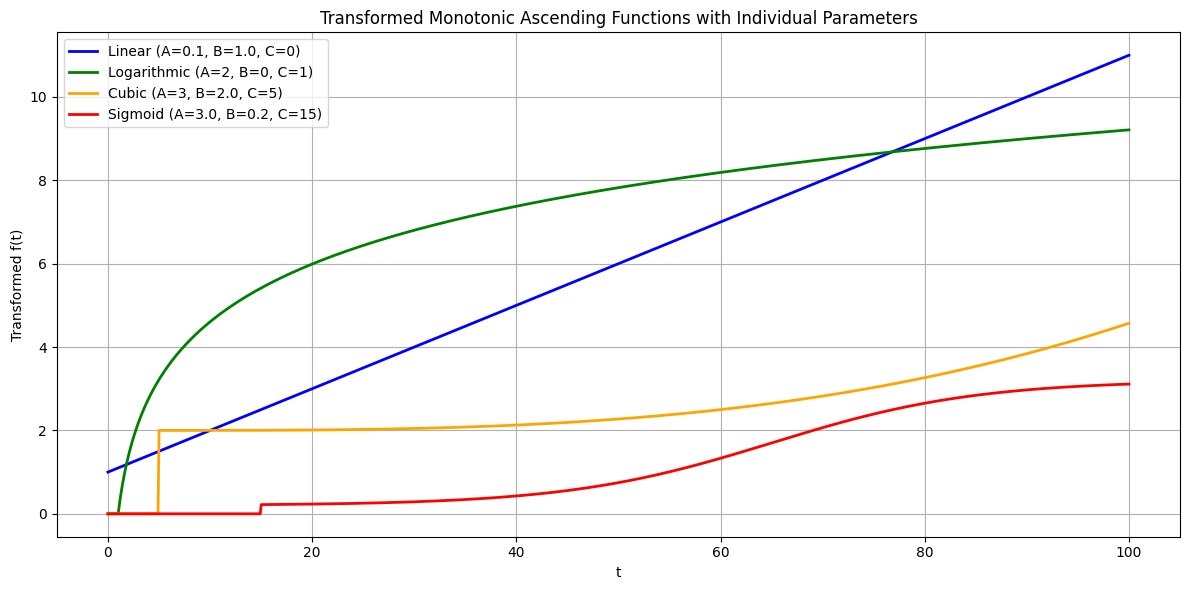

In [3]:

# === Define transformation parameters for each function ===
# Format: 'FunctionName': (A, B, C)
transform_params = {
    'Linear':      (0.1, 1.0, 0),
    'Logarithmic': (2, 0, 1),
    'Cubic':       (3, 2.0, 5),
    'Sigmoid':     (3.0, 0.2, 15)
}

# Mapping of function names to their base functions
functions = {
    'Linear': linear,
    'Logarithmic': logarithmic,
    'Cubic': cubic,
    'Sigmoid': sigmoid
}

# Colors for plotting
colors = {
    'Linear': 'blue',
    'Logarithmic': 'green',
    'Cubic': 'orange',
    'Sigmoid': 'red'
}

# === Plot all transformed functions ===
plt.figure(figsize=(12, 6))

for label, func in functions.items():
    A, B, C = transform_params[label]
    t_trans, y_trans = transform_function(func, t, A, B, C)
    plt.plot(t_trans, y_trans, label=f'{label} (A={A}, B={B}, C={C})', linewidth=2, color=colors[label])

plt.title('Transformed Monotonic Ascending Functions with Individual Parameters')
plt.xlabel('t')
plt.ylabel('Transformed f(t)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Example of the sum of the 4 functions after transformation

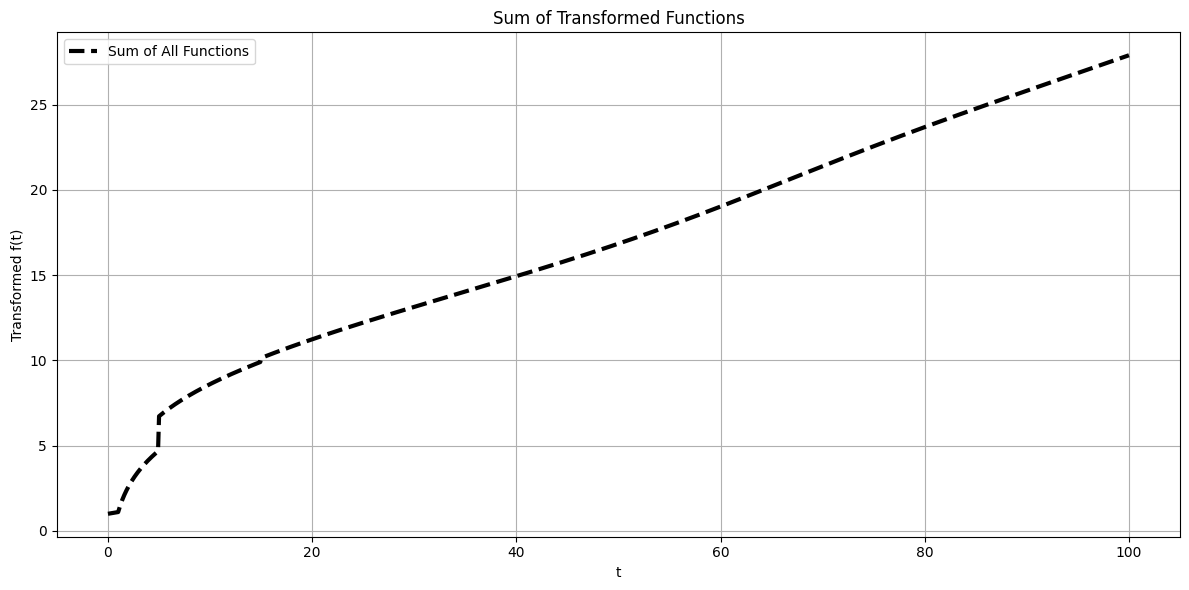

In [4]:

# === Apply transformations and sum them ===
t_sum, y_sum = sum_transformed_functions(t, functions, transform_params)

plt.figure(figsize=(12, 6))
plt.plot(t_sum, y_sum, label='Sum of All Functions', color='black', linestyle='--', linewidth=3)
plt.title('Sum of Transformed Functions')
plt.xlabel('t')
plt.ylabel('Transformed f(t)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Generating the dataset for the model with the same approach

In [5]:

#Define parameter ranges (adjust as needed)
A_min, A_max = 0.1, 10.0  # amplitude scaling range
B_min, B_max = 0.0, 10.0  # vertical translation range
C_min, C_max = 0, 50     # time shift range

#  Prepare to store the dataset
num_samples = 20000 # Num samples to generate for the dataset
data_list = []  # will hold each example as a dict


In [6]:
# Create column names for the parameters
param_names = []
for f_name in ['Linear', 'Logarithmic', 'Cubic', 'Sigmoid']:
    param_names.extend([f"{f_name}_A", f"{f_name}_B", f"{f_name}_C"])

# Create column names for the feature vector (sum function)
feature_names = [f"f_{i}" for i in range(len(t))]

In [7]:

# 7. Generate the dataset
for i in range(num_samples):
    sample_params = {}  # to hold the 12 parameters for this sample
    sum_signal = np.zeros_like(t)  # initialize the summed signal

    # For each function, sample random parameters and add the transformed signal
    for f_name, func in functions.items():
        A = np.random.uniform(A_min, A_max)
        B = np.random.uniform(B_min, B_max)
        C = np.random.uniform(C_min, C_max)
        sample_params[f"{f_name}_A"] = A
        sample_params[f"{f_name}_B"] = B
        sample_params[f"{f_name}_C"] = C

        # Compute the transformed signal and add it to the sum
        _, y_trans = transform_function(func, t, A, B, C)
        sum_signal += y_trans
       


    # Create a dictionary for this sample: features + target parameters
    sample_dict = {f"f_{idx}": val for idx, val in enumerate(sum_signal)}
    sample_dict.update(sample_params)
    data_list.append(sample_dict)

In [8]:
# 8. Convert the list to a DataFrame
df = pd.DataFrame(data_list)

# 9. Save the DataFrame to a CSV file
csv_filename = "transformed_functions_dataset.csv"
df.to_csv(csv_filename, index=False)
print(f"Dataset saved to {csv_filename}")

Dataset saved to transformed_functions_dataset.csv


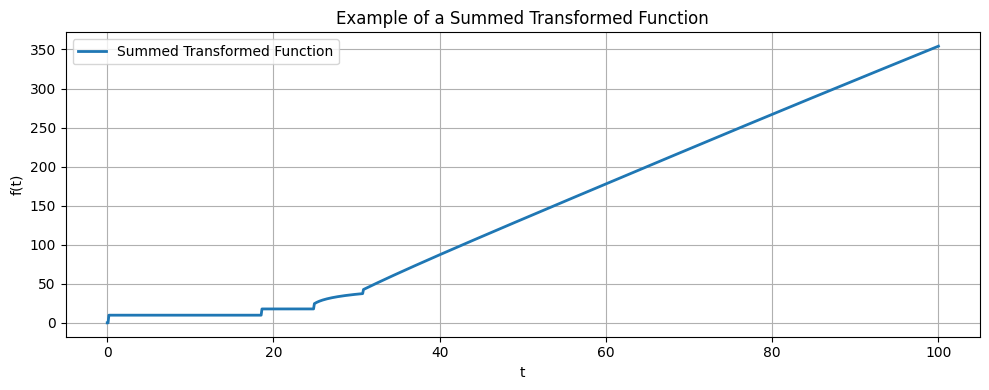

In [9]:

# (Optional) Visualize one example to see the sum function:
example_idx = 95  # change to any index between 0 and num_samples-1
example_row = df.iloc[example_idx]
sum_function_example = example_row[feature_names].values.astype(float)

plt.figure(figsize=(10, 4))
plt.plot(t, sum_function_example, label="Summed Transformed Function", linewidth=2)
plt.title("Example of a Summed Transformed Function")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()